
# Advanced Contour Properties
## 識別魔術方塊

In [55]:
import numpy as np
import imutils
import cv2

# 資料視覺化模組
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 不要顯示惱人的 warning 訊息
import warnings
warnings.filterwarnings('ignore')

# 在 Notebook 裡可即時繪圖
%matplotlib inline  

plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams.update({'font.size':13})

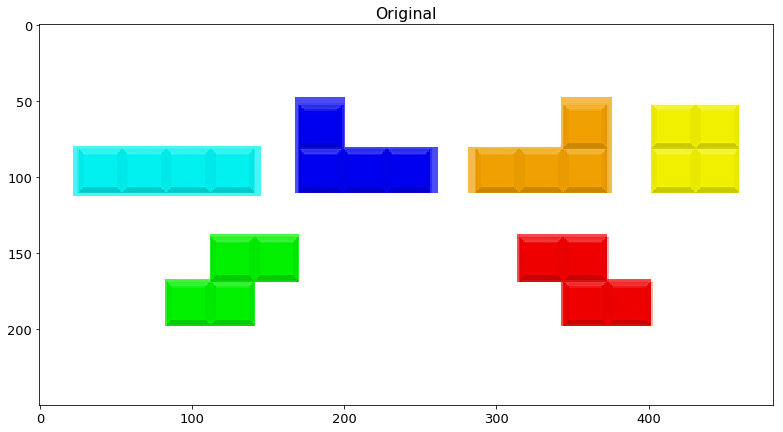

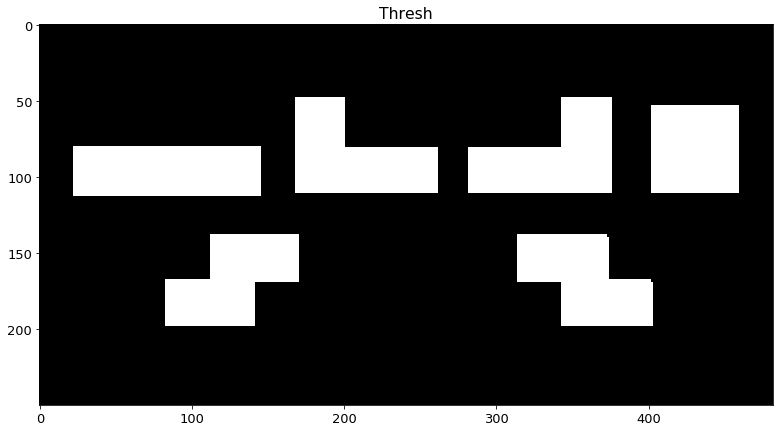

In [60]:
# load the Tetris block image, convert it to grayscale, and threshold
# the image
image = cv2.imread("../input/tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

# show the original and thresholded images
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Thresh")
plt.imshow(thresh, cmap="gray")
plt.show()

In [61]:
# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

## Aspect Ratio & Extent 寬高比 & 範圍

- aspect ratio = image width / image height
- extent = shape area / bounding box area
- solidity = contour area / convex hull area
1. aspect ratio，用於檢測方型物體
2. extent，用於檢測 L 型物體
3. convex hull，；用於檢測凹/凸形狀物體，例如 Z 型

Contour #1 -- aspect_ratio=1.48, extent=0.66, solidity=0.81


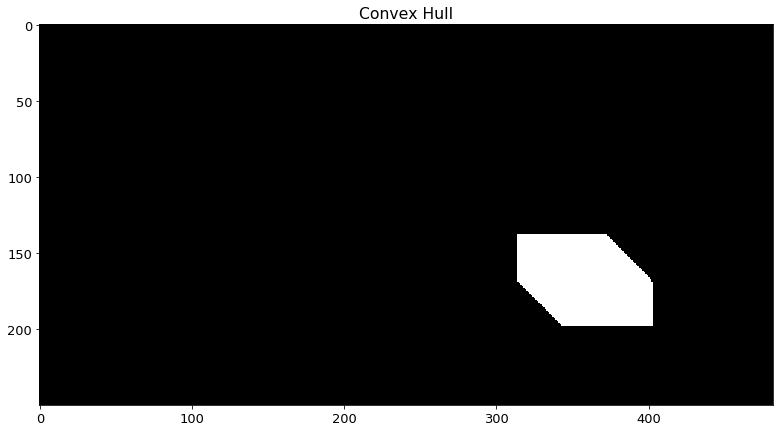

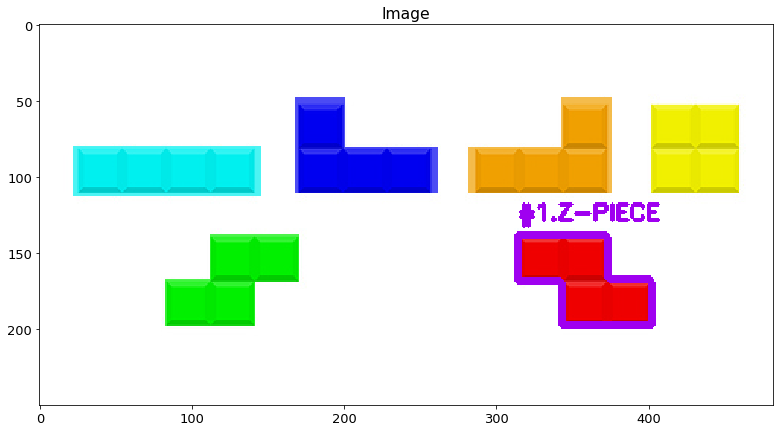

Contour #2 -- aspect_ratio=1.47, extent=0.65, solidity=0.80


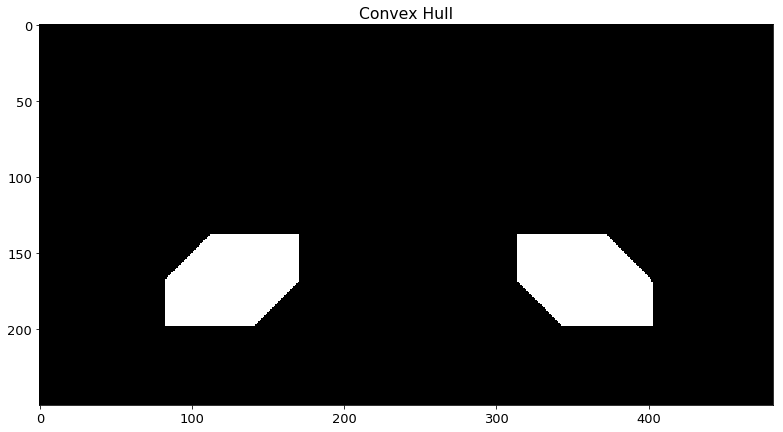

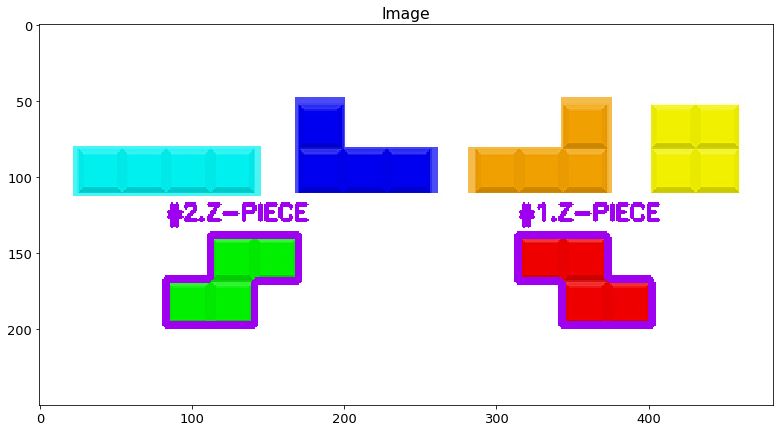

Contour #3 -- aspect_ratio=3.76, extent=0.96, solidity=1.00


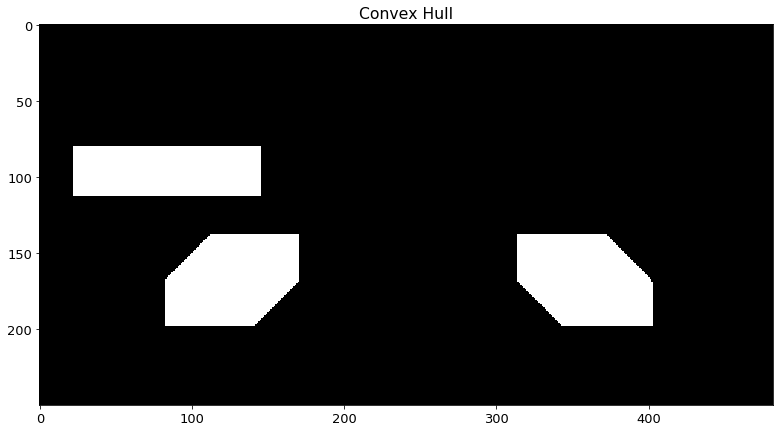

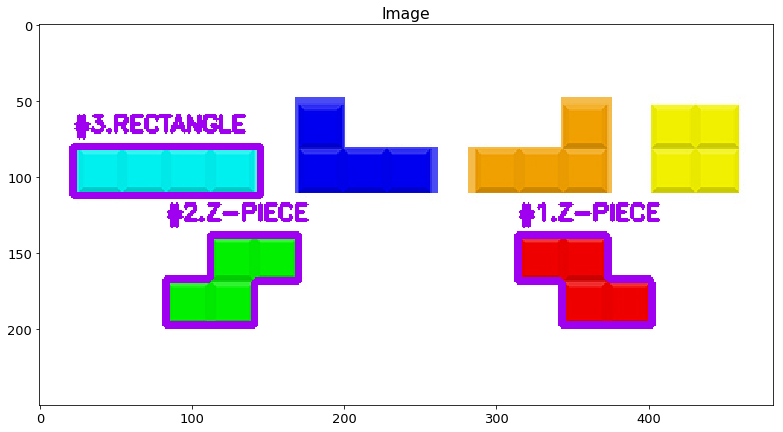

Contour #4 -- aspect_ratio=1.00, extent=0.97, solidity=1.00


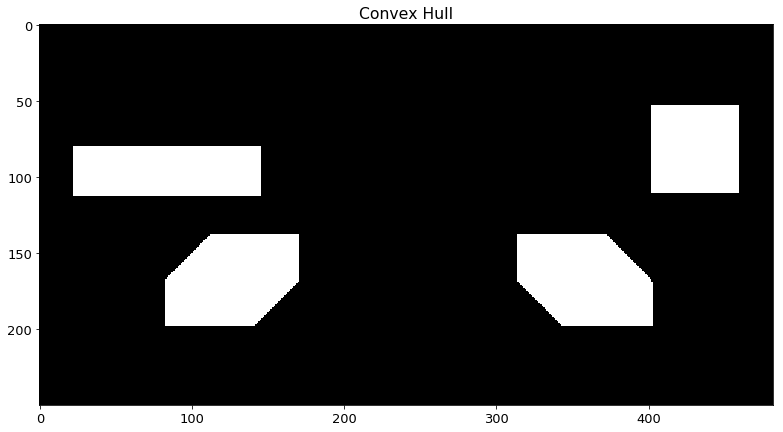

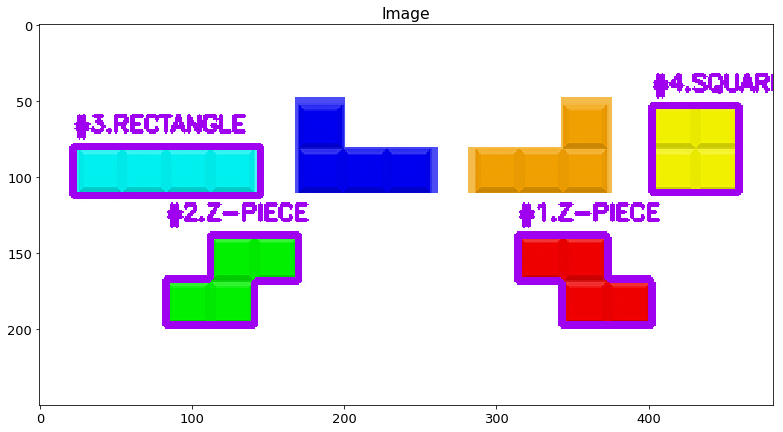

Contour #5 -- aspect_ratio=1.49, extent=0.63, solidity=0.79


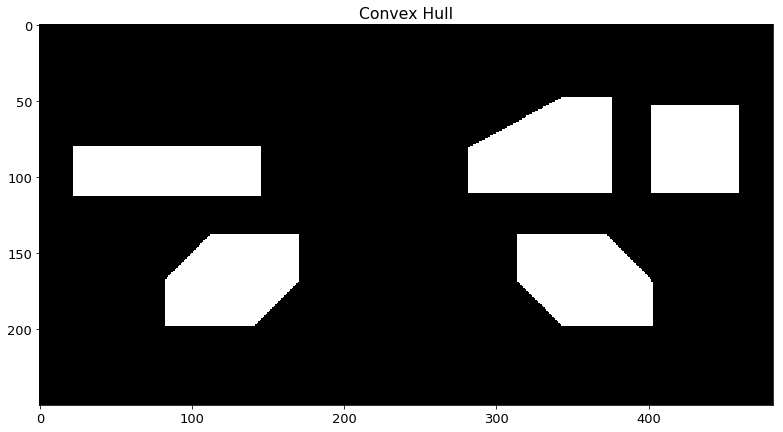

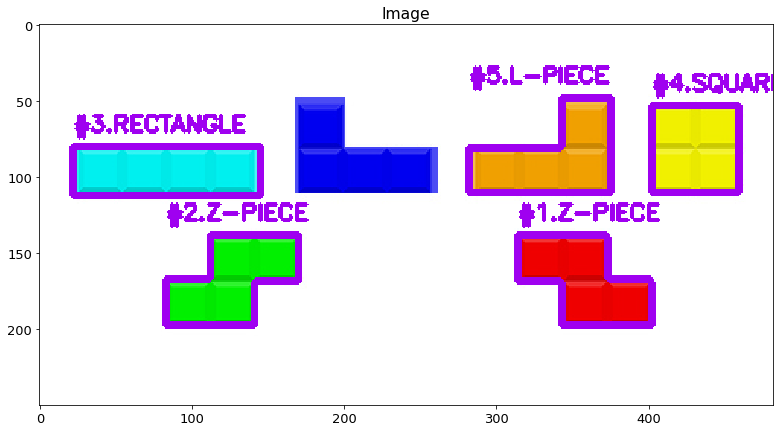

Contour #6 -- aspect_ratio=1.49, extent=0.63, solidity=0.79


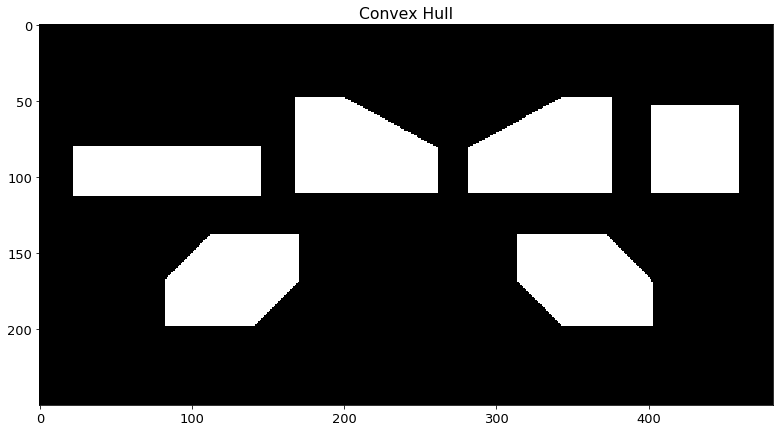

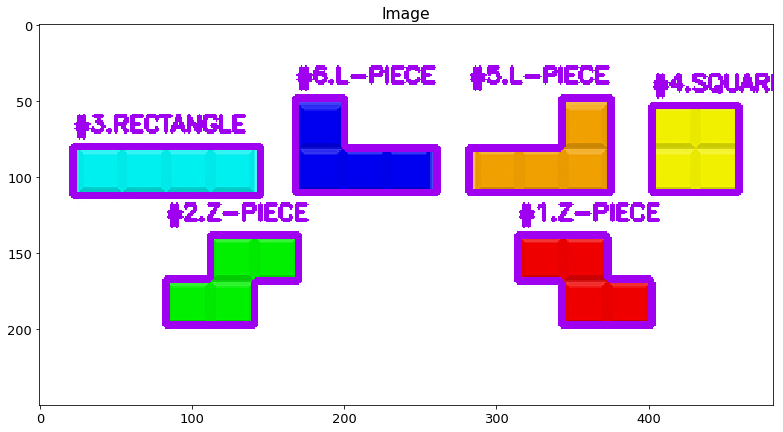

In [64]:
# This is just for capable of re-running the cell
image2 = image.copy()
hullImage2 = hullImage.copy()

# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the aspect ratio of the contour, which is simply the width
    # divided by the height of the bounding box
    aspectRatio = w / float(h)

    # use the area of the contour and the bounding box area to compute
    # the extent
    extent = area / float(w * h)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # visualize the original contours and the convex hull and initialize
    # the name of the shape
    cv2.drawContours(hullImage2, [hull], -1, 255, -1)
    cv2.drawContours(image2, [c], -1, (240, 0, 159), 3)
    shape = ""

    # if the aspect ratio is approximately one, then the shape is a square
    if aspectRatio >= 0.98 and aspectRatio <= 1.02:
        shape = "SQUARE"

    # if the width is 3x longer than the height, then we have a rectangle
    elif aspectRatio >= 3.0:
        shape = "RECTANGLE"

    # if the extent is sufficiently small, then we have a L-piece
    elif extent < 0.65:
        shape = "L-PIECE"

    # if the solidity is sufficiently large enough, then we have a Z-piece
    elif solidity > 0.80:
        shape = "Z-PIECE"

    # draw the shape name on the image
    cv2.putText(image2, "#{}.{}".format(i + 1, shape), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (240, 0, 159), 2)

    # show the contour properties
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
        .format(i + 1, aspectRatio, extent, solidity))

    # show the output images
    plt.title("Convex Hull")
    plt.imshow(hullImage2, cmap="gray")
    plt.show()
    
    plt.title("Image")
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.show()


## Quiz

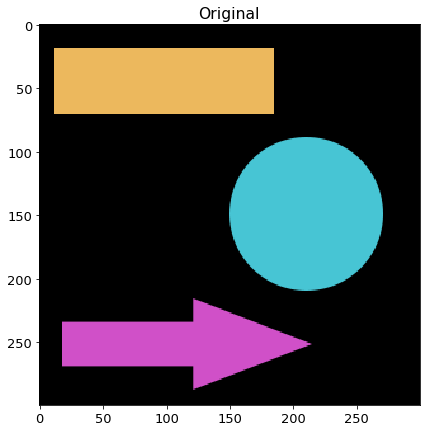

In [49]:
# load the Tetris block image, convert it to grayscale, and threshold
# the image
test = cv2.imread("../input/more_shapes_example.png")
gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)


# show the original and thresholded images
plt.title("Original")
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.show()

In [50]:
# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

Contour #1 -- aspect_ratio=2.74, extent=0.49, solidity=0.78


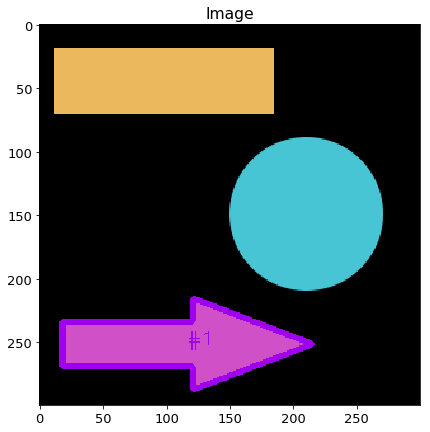

Contour #2 -- aspect_ratio=1.00, extent=0.79, solidity=0.99


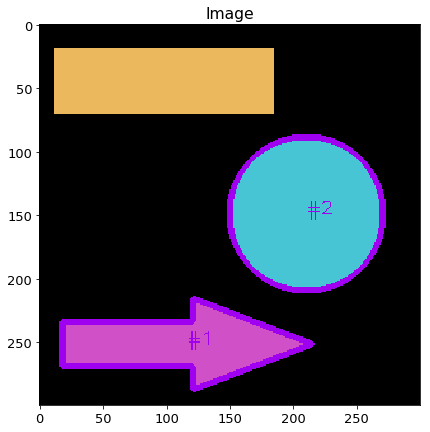

Contour #3 -- aspect_ratio=3.33, extent=0.98, solidity=1.00


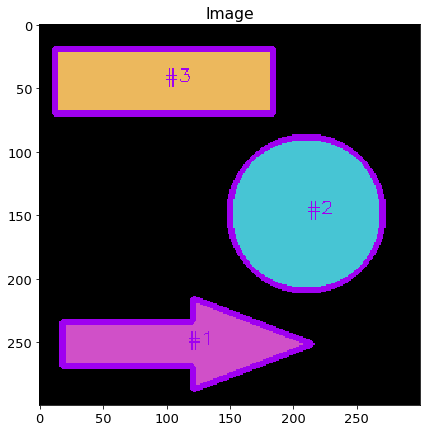

In [53]:
# This is just for capable of re-running the cell
test2 = test.copy()

# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the aspect ratio of the contour, which is simply the width
    # divided by the height of the bounding box
    aspectRatio = w / float(h)

    # use the area of the contour and the bounding box area to compute
    # the extent
    extent = area / float(w * h)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)
    
    cv2.drawContours(test2, [c], -1, (240, 0, 159), 3)
    
    # draw the shape name on the image
    #cv2.putText(test, "#{}".format(i + 1), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
    #    (240, 0, 159), 2)
    cv2.putText(test2, "#{}".format(i + 1), (x + int(w / 2), y + int(h / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (240, 0, 159), 1)
    
    # show the contour properties
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
        .format(i + 1, aspectRatio, extent, solidity))
    
    plt.title("Image")
    plt.imshow(cv2.cvtColor(test2, cv2.COLOR_BGR2RGB))
    plt.show()